## Open spatial object as xarray

In [8]:
import xarray as xr
import spatialproteomics as sp
sp_object = xr.open_zarr("AKOYA_out_mid_tissue/sp_object.zarr")
sp_object

<xarray.Dataset> Size: 48GB
Dimensions:               (channels: 61, y: 22000, x: 33600, cells: 253036,
                           features: 29)
Coordinates:
  * cells                 (cells) int64 2MB 1 2 3 4 ... 253034 253035 253036
  * channels              (channels) <U20 5kB 'DAPI' 'Keratin 14' ... 'CD206'
  * features              (features) <U20 2kB 'CD11b_binarized' ... 'centroid-1'
  * x                     (x) int64 269kB 0 1 2 3 4 ... 33596 33597 33598 33599
  * y                     (y) int64 176kB 0 1 2 3 4 ... 21996 21997 21998 21999
Data variables:
    _image                (channels, y, x) uint8 45GB ...
    _intensity            (cells, channels) float64 123MB ...
    _intensity_raw        (cells, channels) float64 123MB ...
    _obs                  (cells, features) float64 59MB ...
    _percentage_positive  (cells, channels) float64 123MB ...
    _segmentation         (y, x) int32 3GB ...

In [15]:
## how to get some tables
df_intensity = sp_object._intensity_raw.to_dataframe()
df_intensity

_intensity_raw
cells  channels                  
1      DAPI              3.213114
       Keratin 14        1.272666
       CD107             0.069302
       CD4               1.694230
       CD31              0.000000
...                           ...
253036 CD11b             0.000000
       CD39              0.000000
       SOX2              0.000000
       Podoplanin        0.000000
       CD206             0.000000

[15435196 rows x 1 columns]

In [17]:
#lets put it in format one row = one cell
df_wide = (
    df_intensity
    .reset_index()
    .pivot(index="cells", columns="channels", values="_intensity_raw")
)
df_wide

channels,Bcl-2,Beta-actin,CD107,CD11b,CD11c,CD14,CD163,CD20,CD206,CD209,...,Podoplanin,SMA,SOX2,TCF-1,TOX,TP63,VISTA,Vimentin,b-Catenin1,iNOS
cells,,,,,,,,,,,,,,,,,,,,,
1,2.802710,2.213994,0.069302,2.275505,0.008073,0.751186,1.439690,1.183823,0.444985,1.316437,...,2.659571,0.000000,2.270193,2.673782,1.819258,3.371218,1.091251,0.834958,2.904687,0.0
2,2.580421,0.976801,0.145935,1.868378,0.175341,0.000000,0.000000,0.284447,0.045374,1.142097,...,2.170704,0.000000,1.271323,1.758701,1.129710,2.224088,1.228509,3.198227,1.516671,0.0
3,2.066836,0.208533,0.000478,1.761564,0.029661,0.000000,0.000000,0.278215,0.144946,1.237004,...,2.856364,0.000000,0.000000,2.183171,1.252781,3.329344,0.002392,0.752717,1.537945,0.0
4,0.695448,1.822760,0.256181,0.999520,0.000000,0.000000,0.000000,0.610923,0.085866,0.655022,...,2.280043,2.668149,0.000000,2.244854,0.641136,0.005396,0.000000,3.398231,1.744116,0.0
5,2.628159,2.681217,0.412667,2.712741,1.009958,1.843992,2.109387,0.739972,0.303646,1.360012,...,2.243678,0.000000,0.000000,3.231583,1.339768,3.109843,0.326956,2.239956,1.713611,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253032,0.790302,0.741505,0.159605,0.747003,0.000000,0.000000,0.000000,0.104773,0.000000,0.059539,...,1.191217,0.000000,0.000000,1.585164,0.118869,0.461461,0.000000,1.159232,1.350441,0.0
253033,1.972090,0.385713,0.000000,1.781020,0.000000,0.000000,0.000000,0.027903,0.016278,0.955032,...,1.629817,0.000000,0.000000,0.997984,0.942502,2.680300,0.000000,3.641816,0.572809,0.0
253034,0.472452,0.180966,0.019548,0.350664,0.000000,0.000000,0.000000,0.022554,0.000000,0.025561,...,1.211742,0.000000,0.000000,0.991682,0.070618,0.000000,0.000000,2.027662,1.426012,0.0


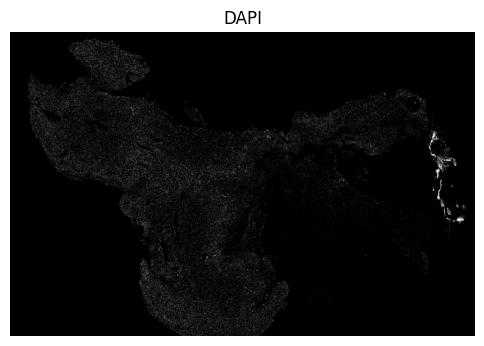

In [18]:
#lets plot image

downsample = 10 # if image is huge, for displaying use downsampling

import matplotlib.pyplot as plt

img = sp_object._image.sel(channels="DAPI").values  # choose channel

plt.figure(figsize=(6,6))
plt.imshow(img[::downsample, :: downsample], cmap="gray")
plt.axis("off")
plt.title("DAPI")
plt.show()


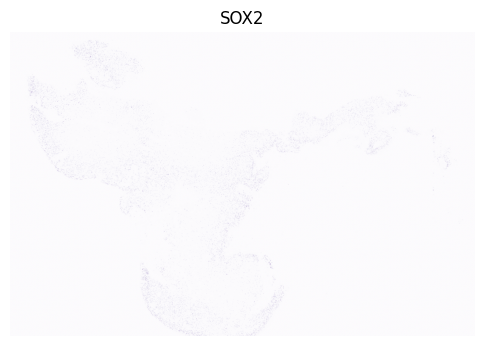

In [28]:
img = sp_object._image.sel(channels="SOX2").values  # choose channel


plt.figure(figsize=(6,6))
plt.imshow(img[::downsample, :: downsample], cmap="Purples")
plt.axis("off")
plt.title("SOX2")
plt.show()


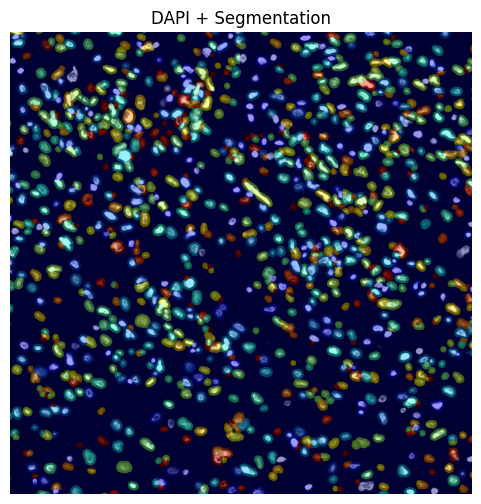

In [30]:
## lets plot DAPI together with segmentation mask
## If image is too big, we need to plot some crop of the whole image

x_crop = [10000, 11000]
y_crop = [15000, 16000]

img = sp_object._image.sel(channels="DAPI").values[x_crop[0]:x_crop[1], y_crop[0]:y_crop[1]]
seg = sp_object._segmentation.values[x_crop[0]:x_crop[1], y_crop[0]:y_crop[1]]

plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")

plt.imshow(seg, cmap="jet", alpha=0.4)  # transparency overlay
plt.axis("off")
plt.title("DAPI + Segmentation")
plt.show()

## Anndata h5ad file

In [8]:
import anndata
adata = anndata.read_h5ad('run_AKOYA_out/anndata.h5ad') #here I open output for another, smaller dataset
adata

AnnData object with n_obs × n_vars = 7672 × 61
    obs: 'CD11b_binarized', 'CD11c_binarized', 'CD14_binarized', 'CD163_binarized', 'CD206_binarized', 'CD209_binarized', 'CD21_binarized', 'CD31_binarized', 'CD39_binarized', 'CD3e_binarized', 'CD45RO_binarized', 'CD4_binarized', 'CD66_binarized', 'CD68_binarized', 'CD79a_binarized', 'CD8_binarized', 'Granzyme-B_binarized', 'IDO1_binarized', 'IFNG_binarized', 'Ki67_binarized', 'MPO_binarized', 'SMA_binarized', 'SOX2_binarized', 'TCF-1_binarized', 'TOX_binarized', 'VISTA_binarized', 'area', 'centroid-0', 'centroid-1'
    uns: 'spatial'
    obsm: 'spatial', 'spatial_um'

In [9]:
# obs part contains binary gene presence matrix
adata.obs

,CD11b_binarized,CD11c_binarized,CD14_binarized,CD163_binarized,CD206_binarized,CD209_binarized,CD21_binarized,CD31_binarized,CD39_binarized,CD3e_binarized,...,Ki67_binarized,MPO_binarized,SMA_binarized,SOX2_binarized,TCF-1_binarized,TOX_binarized,VISTA_binarized,area,centroid-0,centroid-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,715.0,1843.702786,2225.080495
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,349.0,2837.219512,1994.739837
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,493.0,1609.341014,991.359447
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.0,1963.102190,7.065693
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,502.0,925.112245,586.260204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,187.0,454.194030,2061.940299
7669,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0,627.200000,920.300000
7670,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,112.0,715.800000,612.400000
7671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,119.0,2727.851852,558.074074


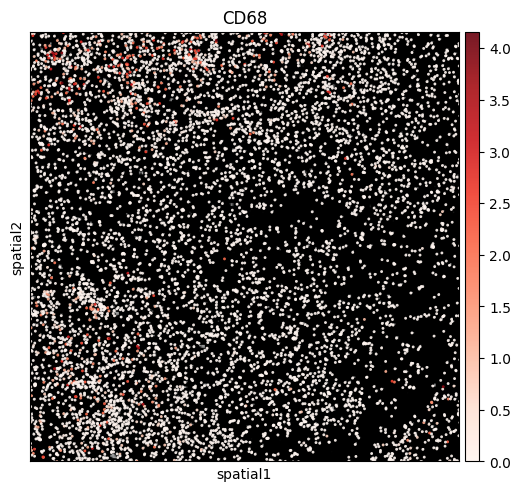

In [11]:
# anndata object is compatible with squidpy spatial funciton

import squidpy as sq

sq.pl.spatial_scatter(adata, color='CD68', library_id="anndata", size = 1, alpha = 0.9, cmap = 'Reds')  # shows image + points=cells
